# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [2]:
import numpy as np
from sklearn.datasets import load_files 
data_test = load_files('dogImages/train')

In [3]:
type(data_test)

sklearn.utils.Bunch

In [4]:
dog_file = np.array(data_test['filenames'])

In [5]:
data_test['target']

array([94, 56, 87, ..., 28, 45, 47])

'target' key returns the target categories as integers. 

In [6]:
data_test['target_names'][:10]

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog']

In [7]:
first_raw_data = np.array(data_test['data'][0])

In [8]:
type(first_raw_data)

numpy.ndarray

In [13]:
dog_file[1]

'dogImages/train/057.Dalmatian/Dalmatian_04054.jpg'

In [14]:
dog_files = np.array(data_test['filenames'])

In [15]:
dog_files

array(['dogImages/train/095.Kuvasz/Kuvasz_06442.jpg',
       'dogImages/train/057.Dalmatian/Dalmatian_04054.jpg',
       'dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06014.jpg',
       ..., 'dogImages/train/029.Border_collie/Border_collie_02069.jpg',
       'dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03261.jpg',
       'dogImages/train/048.Chihuahua/Chihuahua_03416.jpg'], dtype='<U99')

*I don't understand. It seems like all we are getting out of this is a list of files and not the actual data. Do we extract the data later in the program?*

In [17]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
#for unix style path expansion
from glob import glob

# define function to load train, test, and validation datasets
#specify path to train, test or valid folders
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    #convert into 133 dummy vars in a numpy matrix
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    #dog_files will be features and dog_targets will labels
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('dogImages/train')
valid_files, valid_targets = load_dataset('dogImages/valid')
test_files, test_targets = load_dataset('dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [18]:
train_files

array(['dogImages/train/095.Kuvasz/Kuvasz_06442.jpg',
       'dogImages/train/057.Dalmatian/Dalmatian_04054.jpg',
       'dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06014.jpg',
       ..., 'dogImages/train/029.Border_collie/Border_collie_02069.jpg',
       'dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03261.jpg',
       'dogImages/train/048.Chihuahua/Chihuahua_03416.jpg'], dtype='<U99')

Still just seem to have a list of file names. 

### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [19]:
import random
random.seed(8675309)

In [20]:
# load filenames in shuffled human dataset
human_files = np.array(glob("lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


In [21]:
b = [1,2,3,4,5]
arr = np.array(b)
print(arr)
print(random.shuffle(arr))
print(arr)

[1 2 3 4 5]
None
[3 5 1 4 2]


So shuffle works in place and returns None. So if you just print shuffle being called on a sequence you don't get anything back, but if you go back and print the object after shuffle() has been called on it you get the result you expect. 

---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [22]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

In [23]:
face_cascade

<CascadeClassifier 0x12da7af10>

*[OpenCV website](https://opencv.org/about.html) explains that it is a repository of algorithms for various computer vision problems. I don't know. Apparently among those are some pre-trainied face detectors.*

In [24]:
# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [25]:
#three faces
print(img.shape)
#transformed into a single grayscale image
print(gray.shape)

(250, 250, 3)
(250, 250)


In [26]:
#note how sparse the matrix is.
gray.imag

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [27]:
print(gray.argmin())
print(gray.argmax())
print(gray.view()) #different from .imag. Why?

0
47476
[[  0   0   0 ...   2   0   5]
 [  0   0   0 ...   1   1   9]
 [  0   0   0 ...  55  62  82]
 ...
 [  0   0   0 ... 181 180 179]
 [  0   0   0 ... 181 180 180]
 [  0   0   0 ... 181 180 180]]


In [28]:
# find faces in image
faces = face_cascade.detectMultiScale(gray)
faces

array([[ 75,  68, 112, 112]], dtype=int32)

In [29]:
# print number of faces detected in the image
print('Number of faces detected:', len(faces))

Number of faces detected: 1


In [30]:
# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

The above code is the coordinates of a box that encloses a detected face. The x and y coordinates mark the lower left hand corner of the box. The next two points must mark the upper right hand corner. My guess is that the (255,0,0) is telling us that the line is bright Blue (this app uses a BGR color scheme, which is why it has to be converted to RGB below). The last little 2 hanging out on the end could be line thickness.  

In [31]:
#interesting function to add text--review docs
#cv2.addText(img, 'Robert Duvall')

In [32]:
cv2

<module 'cv2' from '/Users/michaelreinhardme.com/anaconda3/lib/python3.6/site-packages/cv2.cpython-36m-darwin.so'>

In [33]:
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [34]:
cv_rgb.shape

(250, 250, 3)

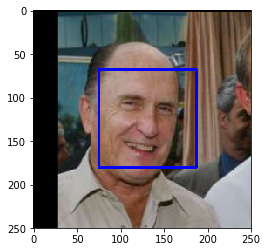

In [35]:
# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [36]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

Now with the above code I have to give it a path to the file I want it to evaluate. If there is no face detected then len(faces) is not greater than 0. 

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

100% of the images which contained a 'human' images were identified as having a human face. That is perfect performance on sensitivity (TP/(TP + FN)). No human face escaped undetected. However 12% of the images of dogs were also identified as having a human face. So this algorithm has perfect recall (or sensitivity) but that comes with a 12% false positive rate. In other words, the precision of the algorithm on this data was TP/(TP + FP), or 100/112 = 89%. 

In [37]:
100/112

0.8928571428571429

In [38]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
humans = 0
for path in human_files_short:
    if face_detector(path)==True:
        humans += 1

dogs = 0
for path in dog_files_short:
    if face_detector(path)==True:
        dogs += 1
        
print("humans: {}".format(humans/100))
print("dogs: {}".format(dogs/100))

humans: 1.0
dogs: 0.12


Precision is the proportiong of things your model labeled positive that actually are positive: 
$$ Precision = \frac{TP}{TP+FP} $$

Sensitivity, or Recall, is the proportion of things are positive that you actually labeled as positive: 
$$ Sensitivity = \frac{TP}{TP+FN} $$

In [39]:
precision = humans / (humans + dogs)
sensitivity = humans / (humans + 0)

In [40]:
print(f"{precision:.02f}")
print(sensitivity)

0.89
1.0


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__
So the detector seems to get 100% of the human faces and wrongly identifies 12% of the images of dogs presented to it as humans. In terms of precision and recall this is 89% Precision and 100% Recall (or Sensitivity). If there is a human face submitted the app will find it but at the expense of telling some of our users (assuming they are all human) that they their dog is a human. This is not idea but it would appear to be better than telling humans they are dogs. Since the app will still supply a predicted dog breed for the images it erroneously identifies as humans it would seem that this is an acceptable trade-off.  

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

In [49]:
## (Optional) Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [42]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

Ok, so this is just a file of weights but it takes a long time to download. There appear to be just over 100 million weights. It has downloaded it as an h5 file. The 'h' is for Heirarchical Data Format. It is for storing and transferring multidimensional scientific data. 

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [43]:
from keras.preprocessing import image                  
from tqdm import tqdm

tqdm is from (taqadum, تقدّم) in Arabic. It means progress. The module just tracks the progress of a program. On the two functions defined below we have a choice of doing all the paths or just one at a time. 

In [44]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    #it looks like there might be a problem with tqdm so I am trying it without it
#     list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

In [45]:
tensors = paths_to_tensor(human_files_short)

100%|██████████| 100/100 [00:00<00:00, 132.40it/s]


### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

*I have no idea why the order of the colors has to be changed from Red Green Blue to Blue Green Red, but it does. The reason that we subtract the mean pixel for each channel is more understandable. You want to have centered data and the fat that the data is colors doesn't really change that.*

*So the function below returns the category that scores the highest and so tells us what ResNet50 thinks the object is.*

In [46]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [47]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path): 
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

So, this dog detector preforms much better. It has 100% accuracy, no errors of Type I or Type II. That is pretty amazing. Somewhat worrying, in fact. Or maybe it is easy to tell that an image of a human is not a dog but, as we were doing with the human face detector, not quite so easy to be sure that an image of a dog is not a human? Maybe there are a lot of features that absolutely rule out an image being a human--like having four legs--but not so many things that rule out an image being a dog? Or maybe the dog detector is just a better model? 

In [48]:
### Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
humans = 0
dogs = 0

for i in dog_files_short:
    dogs += dog_detector(i)

for i in human_files_short:
    humans += dog_detector(i)

In [50]:
print(dogs)
print(humans)

100
0


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [51]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:23<00:00, 34.89it/s]


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__ 
I started with the model Udacity suggested and added dropout layers. I reasoned that the architecture you specified would work and the only obvious improvement that I knew for certain how to impliment and thoroughly understood was adding dropout layers. 

In [52]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

### Define architecture.
model.add(Conv2D(filters=16, kernel_size=2, strides=1, padding="same", activation="relu", input_shape=(224,224,3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=4))

model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=4))
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=4))


model.add(Conv2D(filters=128, kernel_size=2, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))

model.add(Flatten())
#model.add(Dense(200,activation="relu"))
model.add(Dense(133,activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        8256      
__________

### Compile the Model

In [53]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [54]:
from keras.callbacks import ModelCheckpoint  

### specify the number of epochs that you would like to use to train the model.

epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
6660/6680 [============================>.] - ETA: 0s - loss: 4.8777 - acc: 0.0114
Epoch 00001: val_loss improved from inf to 4.85209, saving model to saved_models/weights.best.from_scratch.hdf5
6680/6680 [==============================] - 274s 41ms/step - loss: 4.8775 - acc: 0.0114 - val_loss: 4.8521 - val_acc: 0.0216
Epoch 2/5
6660/6680 [============================>.] - ETA: 0s - loss: 4.6681 - acc: 0.0308
Epoch 00002: val_loss improved from 4.85209 to 4.66915, saving model to saved_models/weights.best.from_scratch.hdf5
6680/6680 [==============================] - 265s 40ms/step - loss: 4.6675 - acc: 0.0308 - val_loss: 4.6692 - val_acc: 0.0371
Epoch 3/5
6660/6680 [============================>.] - ETA: 0s - loss: 4.4153 - acc: 0.0453
Epoch 00003: val_loss improved from 4.66915 to 4.52379, saving model to saved_models/weights.best.from_scratch.hdf5
6680/6680 [==============================] - 235s 35ms/step - loss: 4.4144 - acc:

### Load the Model with the Best Validation Loss

In [55]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [56]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 5.2632%


---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [57]:
!pwd

/Users/michaelreinhardme.com/ds/udacity_ml/projects/dog_classifier


In [58]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [59]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))

VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [60]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [61]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6660/6680 [============================>.] - ETA: 0s - loss: 11.6914 - acc: 0.1429
Epoch 00001: val_loss improved from inf to 9.75044, saving model to saved_models/weights.best.VGG16.hdf5
6680/6680 [==============================] - 8s 1ms/step - loss: 11.6867 - acc: 0.1428 - val_loss: 9.7504 - val_acc: 0.2503
Epoch 2/20
6620/6680 [============================>.] - ETA: 0s - loss: 9.1212 - acc: 0.3145
Epoch 00002: val_loss improved from 9.75044 to 9.02797, saving model to saved_models/weights.best.VGG16.hdf5
6680/6680 [==============================] - 2s 233us/step - loss: 9.1178 - acc: 0.3151 - val_loss: 9.0280 - val_acc: 0.3293
Epoch 3/20
6560/6680 [============================>.] - ETA: 0s - loss: 8.5023 - acc: 0.3867
Epoch 00003: val_loss improved from 9.02797 to 8.74126, saving model to saved_models/weights.best.VGG16.hdf5
6680/6680 [==============================] - 1s 220us/step - loss: 8.5113 - acc: 0.3865 - val_loss: 8

### Load the Model with the Best Validation Loss

In [67]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [68]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 47.1292%


### Predict Dog Breed with the Model

In [69]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]


---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [70]:
### Obtain bottleneck features from another pre-trained CNN.
network = 'VGG19'
bottleneck_features = np.load('bottleneck_features/Dog{}Data.npz'.format(network))

In [71]:
train_VGG19 = bottleneck_features['train']
valid_VGG19 = bottleneck_features['valid']
test_VGG19 = bottleneck_features['test']

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 



In [72]:
train_VGG16.shape[1:]

(7, 7, 512)

In [73]:
### Define architecture.
VGG19_model = Sequential()
VGG19_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))


# VGG19_model.add(Conv2D(64, (4, 4), activation='relu'))
# VGG19_model.add(MaxPooling2D(pool_size=(2, 2)))

VGG19_model.add(Dense(1028, activation='relu'))
VGG19_model.add(Dropout(0.2))

VGG19_model.add(Dense(512, activation='relu'))
VGG19_model.add(Dropout(0.2))

VGG19_model.add(Dense(128, activation='relu'))
VGG19_model.add(Dropout(0.2))

# VGG19_model.add(Flatten())

VGG19_model.add(Dense(133, activation='softmax'))

VGG19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1028)              527364    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1028)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               526848    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
__________

### (IMPLEMENTATION) Compile the Model

In [74]:
### Compile the model.
VGG19_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

9s 1ms/step - loss: 1.3507 - acc: 0.8196 - val_loss: 2.2363 - val_acc: 0.6862
That is how we did on the last epoch with the rmsprop in the optimizer. For the adam optimizer we got: 


### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [75]:
### Train the model.
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG19.hdf5', 
                               verbose=1, save_best_only=True)

VGG19_model.fit(train_VGG19, train_targets,
                validation_data=(valid_VGG19, valid_targets),
                epochs=30, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/30
6640/6680 [============================>.] - ETA: 0s - loss: 4.7100 - acc: 0.0464
Epoch 00001: val_loss improved from inf to 3.60209, saving model to saved_models/weights.best.VGG19.hdf5
6680/6680 [==============================] - 12s 2ms/step - loss: 4.7068 - acc: 0.0466 - val_loss: 3.6021 - val_acc: 0.1940
Epoch 2/30
6640/6680 [============================>.] - ETA: 0s - loss: 2.8777 - acc: 0.2857
Epoch 00002: val_loss improved from 3.60209 to 1.68928, saving model to saved_models/weights.best.VGG19.hdf5
6680/6680 [==============================] - 8s 1ms/step - loss: 2.8742 - acc: 0.2861 - val_loss: 1.6893 - val_acc: 0.5054
Epoch 3/30
6640/6680 [============================>.] - ETA: 0s - loss: 1.8116 - acc: 0.5033
Epoch 00003: val_loss improved from 1.68928 to 1.26198, saving model to saved_models/weights.best.VGG19.hdf5
6680/6680 [==============================] - 10s 1ms/step - loss: 1.8128 - acc: 0.5030 - val_loss: 1.262

6640/6680 [============================>.] - ETA: 0s - loss: 0.3641 - acc: 0.8980
Epoch 00030: val_loss did not improve
6680/6680 [==============================] - 8s 1ms/step - loss: 0.3653 - acc: 0.8979 - val_loss: 1.2442 - val_acc: 0.7605


### (IMPLEMENTATION) Load the Model with the Best Validation Loss
*The model has a method, load_weights, that allows us to set up a model with weights that we have saved. In this case our weights have been saved from the training process and the weights that performed best on the validation data (I believe on the validation data) are loaded into the model to run on the testing data.* 

In [76]:
### Load the model weights with the best validation loss.
VGG19_model.load_weights('saved_models/weights.best.VGG19.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.  

*We use the predict method to get the predicted scores based on the test data and calculate the accuracy score for the model. There are really two statements to doing this. We first have to get the indexes for the predictions made by the model. The prediction is the category with the highest probability assigned to is by the model so we just apply argmax to the list produced by running predict on a given prediction. Those predictions are saved in a new list called VGG19_predictions.*

In [77]:
### Calculate classification accuracy on the test dataset.
# get index of predicted dog breed for each image in test set
VGG19_predictions = [np.argmax(VGG19_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG19]

In [78]:
test_targets_preds = [np.argmax(i) for i in test_targets]

In [79]:
sum([pred == test_targets_preds[i] for i, pred in enumerate(VGG19_predictions)])/len(VGG19_predictions)

0.7368421052631579

59% if we round. Tantalizingly close. What else can I do? The accuracy seemed to stop improving well before the 100th epoch. I don't see why batch_size would improve anything. I see it mainly as a computational efficiency issue, but since we are hear why not test that too? 

Changing the batch size to 100 does not change anything as I suspected. (Actually, it went from 0.586 to 0.587 but that doesn't really help us). 

So, I have dialed back the epochs to 30 and the batch size to 20 and now I am trying adam as the optimizer. The validation loss stopped improving in the 7th epoch. Adam gets only 0.581. 

Trying sgd as optimizer (mainly because that is the only other one I remember without looking it up). Again, 0.584, only bouncing around in the established range. Sticking to rmsprop. 

Now I am going to go back and add more layers to the model. 

Wow! I added a couple of Dense/Dropout layers and it really improved things! 72%! Now I see people out there with rates way over the 70s and into the 80s so now I want to try a few more things before I move on. 

First, I am going to try changing the dropout layers from 0.2 to 0.4 and see if that makes things better or worse. 

Wow! that really killed things. The accuracy dropped down from the 70's to the 10's. Don't do that again! I am going to try 0.1 for a dropout just for the heck of it. 

0.692. No improvement.

### New Result
Added a new dense layer and got it up to 72%. So with three dense layers we were able to get above the floor we wanted for our results. I am going to come back and try a couple of other things. I think I will add some convolutional layers before the dense layers and do image augmentation before I turn in the final project, but for now I think I will move on and see if I can impliment the other steps in the model. 

### New Result
Used adam for optimizer instead of rmsprop and got another increase to 0.737, so 74% accuracy. That is something of a surprise because the last time I tried adam it actually lost us about half a percent in accuracy. Anyway, that is pretty good for choosing among 133 categories. 

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

Next step, put everything together into a function. So that is basically taking some of the blocks of code above and combining them into one function.  

What does this function have to do? The image path is the input. Then it takes the model we have defined and uses the prediction function from sklearn on the 

In [80]:
### Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
img_path = 'dogImages/train/057.Dalmatian/Dalmatian_04054.jpg'

def VGG19_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG19(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG19_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

img_path = 'dogImages/train/057.Dalmatian/Dalmatian_04054.jpg'

VGG19_predict_breed(img_path)

'Dalmatian'

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [81]:
### My algorithm
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

def human_dog_breed_detector(img_path):


    #if image is neither human or dog error: this is not human or dog
    #detects whether there is a human face
    def face_detector(img_path):
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray)
        return len(faces) > 0


    def dog_detector(img_path): 
        prediction = ResNet50_predict_labels(img_path)
        return ((prediction <= 268) & (prediction >= 151)) 

    #else save information about whether image is human or not
    is_human = face_detector(img_path)

    is_dog = dog_detector(img_path)
    try: 
        is_human != 0 and is_dog != 0
    except ValueError:
        print("This face is neither dog nor human")
        


    #put image through VGG19
    def VGG19_predict_breed(img_path):
        # extract bottleneck features
        bottleneck_feature = extract_VGG19(path_to_tensor(img_path))
        # obtain predicted vector
        predicted_vector = VGG19_model.predict(bottleneck_feature)
        # return dog breed that is predicted by the model
        return dog_names[np.argmax(predicted_vector)]

    prediction = VGG19_predict_breed(img_path)


    
    if is_human:   
        print("Though human, the breed you most resemble is: {}".format(prediction))
    else:
        print("This predicted breed for this dog is: {}".format(prediction))
        
    #if human out put'the breed you most look like is
    pil_im = Image.open(img_path, 'r')
    imshow(np.asarray(pil_im))
#     print(imshow(np.asarray(pil_im)))

This predicted breed for this dog is: Dalmatian


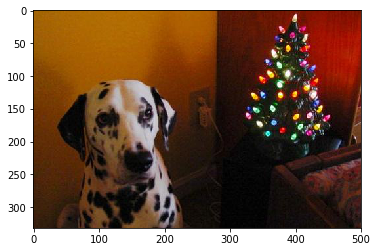

In [82]:
#imput image
img_path = 'dogImages/train/057.Dalmatian/Dalmatian_04054.jpg'
human_dog_breed_detector(img_path)

In [83]:
import os

path = 'test_images/'

images = [i for i in os.listdir(path)]

image_paths = [path + i for i in images if i[0] != '.']

print(image_paths)

# for i, image_path in enumerate(image_paths):
#     human_dog_breed_detector(image_path)
#     if i == 2:
#         break

# print(len(image_paths))

# human_dog_breed_detector('test_images/human_2.jpg')

# from PIL import Image, ImageFilter
# #Read image
# im = Image.open( 'test_images/human_5.jpg' )
# #Display image
# im.show()

# from matplotlib.pyplot import imshow
# import numpy as np
# from PIL import Image

# %matplotlib inline
# pil_im = Image.open('test_images/human_2.jpg', 'r')
# imshow(np.asarray(pil_im))

['test_images/saved_models copy', 'test_images/dog_pit.jpg', 'test_images/dog_golden.jpg', 'test_images/dog_fr_bull.jpg', 'test_images/dog_husky.jpg', 'test_images/dog_bull.jpg', 'test_images/human_4.jpg', 'test_images/human_2.jpg', 'test_images/human_1.jpg']


Though human, the breed you most resemble is: Icelandic_sheepdog


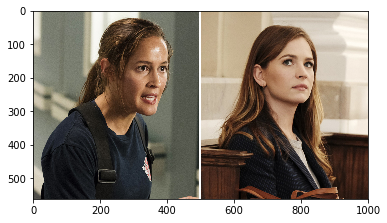

In [84]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
human_dog_breed_detector('images/woman_actress.jpg')

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

While it may be an artifact of the examples I choose, the algorithm does much worse than I expected. The three humans in the data set are correctly identified and assigned a dog breed but the two of the three dogs are identified as humans and the one dog that is correctly identified as a dog may well be misclassified (I thought the image was of a pit bull but the algorithm classifies it as an American Staffordshire Terrier, though the it appears the breeds are closely related and look very similar).  

One point on which the algorithm could be improved is in the guesses it makes about what dog breed it assigns to humans. The human classified as a Chinese Crested is my wife. I don't think she would be happy about it. The Chinese Crested is an ugly dog. On the other hand, it is a hairless dog and since human faces are typically hairless the algorithm might be especially inclined to assign that breed to humans. It might be worth it to simply hard code out Chinese Crested when assigning a dog breed to faces that have been determined by the algorithm as human. The algorithm might be giving too much weight to the hairlessness factor in applying a dog breed to humans whereas the hairlessness characteristic is properly a dominating factor when assigning a breed to dogs. Also, no one wants to be told they look like a Chinese Crested.  

Another point for improvment is the algorithm's 'human' filter. Too many dogs are classified as humans. In the test of the human filter performed above only 12 of 100 dogs were classified as humans but in my sample of 3 dogs 2 were classified as humans. This might be because of my sample--two French bulldogs, a breed that has a particularly human looking face. And, after first deciding that they were human, the algorithm did assign them to the correct breed. Overall, it is striking that the algorithm seems to have trouble with the easier part of the task, distinguishing between the fairly distinct categories of human vs dog, but does well on the seemingly much more difficult task of distinguishing among the 133 relatively similar dog breeds. I think that the order and logic of the human-dog filter in my algorithm is an obvious area for improvement. I could also try out other pre-trained filters for these tasks.  

Finally, something that could be done to improve the performance of the algorithm is training it on more diverse examples. By using the Image generating tool I could improve the algorithm on its core task of assigning a dog breed to images. 

Though human, the breed you most resemble is: Poodle


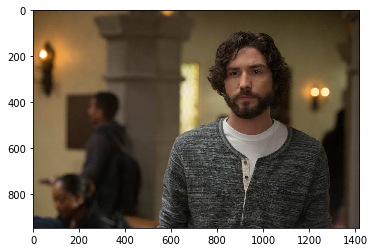

In [85]:
human_dog_breed_detector('test_images/human_2.jpg')

Though human, the breed you most resemble is: Akita


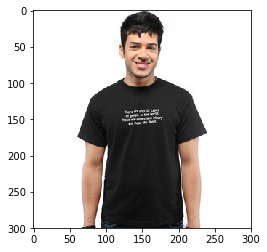

In [86]:
human_dog_breed_detector('test_images/human_1.jpg')

In [87]:
#human_dog_breed_detector('test_images/human_3.jpg')

This predicted breed for this dog is: American_staffordshire_terrier


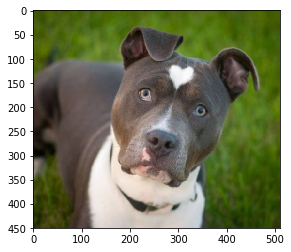

In [88]:
human_dog_breed_detector('test_images/dog_pit.jpg')

Though human, the breed you most resemble is: Boston_terrier


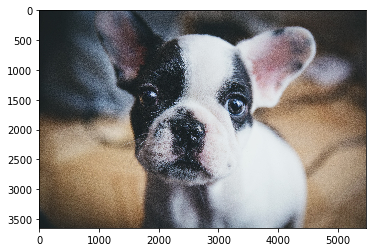

In [89]:
human_dog_breed_detector('test_images/dog_fr_bull.jpg')

Though human, the breed you most resemble is: French_bulldog


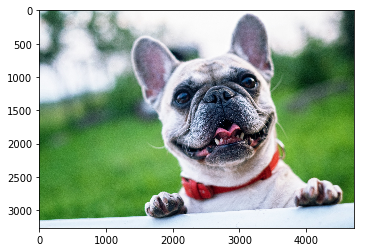

In [90]:
human_dog_breed_detector('test_images/dog_bull.jpg')